Import Libraries

In [29]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Bike Dataset
This dataset is an authentic dataset, collected through survey from almost 500 biker community members in East, Central, and West Java.

In [30]:
# Load dataset
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/bike_classification.csv"
dataset = pd.read_csv(url)
dataset

,Kota,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan),Tujuan Bersepeda (secara singkat)
0,madiun,45,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike),olah raga
1,Pekalongan,50,Pria,166,80,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike),Menggerakkan badan ( olah raga) dalam jarak de...
2,Surabaya,43,Pria,178,73,Cepat (26 km/jam atau lebih),Jalanan Rata,Sepeda Balap (Road Bike),Kesehatan
3,Surabaya,40,Wanita,165,53,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike),berolahraga
4,surabaya,32,Wanita,155,68,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike),mengusir bosan
...,...,...,...,...,...,...,...,...,...
542,Surabaya,20,Wanita,160,60,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Gunung (Mountain Bike/MTB),Olahraga gampang
543,Surabaya,22,Pria,170,75,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike),olahraga
544,Surabaya,20,Pria,173,57,Sedang (16 - 25 km/jam),Jalanan Tidak Rata,Sepeda Balap (Road Bike),Transportasi dan kesehatan
545,Surabaya,21,Pria,174,89,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Lipat (Folding Bike),kesehatan


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Kota                                                547 non-null    object
 1   Usia (tahun)                                        547 non-null    object
 2   Jenis Kelamin                                       547 non-null    object
 3   Tinggi Badan (dalam cm)                             547 non-null    object
 4   Berat Badan (dalam kg)                              547 non-null    object
 5   Kecepatan Bersepeda                                 547 non-null    object
 6   Jenis Permukaan Jalan (yang paling sering dilalui)  547 non-null    object
 7   Jenis Sepeda (yang paling sering digunakan)         547 non-null    object
 8   Tujuan Bersepeda (secara singkat)                   300 non-null    object
dtypes: object(9

In [32]:
#Drop
dataset = dataset.drop("Kota", axis=1)
dataset = dataset.drop("Tujuan Bersepeda (secara singkat)", axis=1)

dataset

,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan)
0,45,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike)
1,50,Pria,166,80,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike)
2,43,Pria,178,73,Cepat (26 km/jam atau lebih),Jalanan Rata,Sepeda Balap (Road Bike)
3,40,Wanita,165,53,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike)
4,32,Wanita,155,68,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike)
...,...,...,...,...,...,...,...
542,20,Wanita,160,60,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Gunung (Mountain Bike/MTB)
543,22,Pria,170,75,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike)
544,20,Pria,173,57,Sedang (16 - 25 km/jam),Jalanan Tidak Rata,Sepeda Balap (Road Bike)
545,21,Pria,174,89,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Lipat (Folding Bike)


In [33]:
dataset.describe()

,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan)
count,547,547,547,547,547,547,547
unique,95,2,56,83,3,2,3
top,20,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Gunung (Mountain Bike/MTB)
freq,26,425,50,32,287,434,303


In [34]:
# Display unique values in each column
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


Unique values in 'Usia (tahun)':
['45' '50' '43' '40' '32' '41' '33' '48' '38' '53' '44' '47' '36' '49'
 '28' '35' '31' '39' '21' '37' '56' '46' '60' '50 tahun' '17 th' '16 thn'
 '17 thn' '19 thn' '58' '55' '57 th' '44 thn' '23' '57' '78' '20' '27'
 '54' '30' '29' '22' '25' '59' '34' '51' '24' '26' '52' '11' '42' '14'
 '18' '42 tahun' '58 tahun' '40 Tahun' '44 th' '19' '22 tahun' '40 thn'
 '52 tahun' '30 tahun' '37 jalan' '18 tahun 8 bulan' '63' '56 tahun'
 '54 th' '46 thn' '1971 / 50 tahun' '61 thn' '53th.' '42 th' '47 tahun'
 '50 TAHUN' '50 th' '52 thn' '54 tahun' '60 th' '40an' '47th' '71 Th'
 '55 th' '32 tahun' '58 th' '70 tahun' '50th' '62 th' '72' '68' '10' '16'
 '15' '17' '65' '13' '53 tahun']

Unique values in 'Jenis Kelamin':
['Pria' 'Wanita']

Unique values in 'Tinggi Badan (dalam cm)':
['165' '166' '178' '155' '167' '184' '179cm' '173' '183' '158' '170' '159'
 '174' '179' '168' '175' '176' '180' '181' '169' '172' '171' '161'
 '160 cm' '167 cm' '168 cm' '170 ccm' '160' '162cm

Fix the Height Data

In [35]:
# Clean 'Tinggi Badan (dalam cm)'
dataset['Tinggi Badan (dalam cm)'] = dataset['Tinggi Badan (dalam cm)'].apply(lambda x: x.strip().split()[0] if isinstance(x, str) and len(x.split()) > 1 else re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else '')

# Print the cleaned
len(dataset['Tinggi Badan (dalam cm)'])

# Sort the cleaned column
sorted_heights = sorted(dataset['Tinggi Badan (dalam cm)'], key=lambda x: int(x) if x.isdigit() else float('inf'))
dataset['Tinggi Badan (dalam cm)'] = dataset['Tinggi Badan (dalam cm)'].astype(int)
# Print the sorted heights
print(sorted_heights)


['148', '148', '149', '150', '150', '150', '151', '151', '151', '151', '151', '151', '151', '152', '152', '152', '152', '152', '152', '153', '153', '153', '153', '153', '153', '153', '154', '154', '154', '154', '154', '154', '154', '154', '154', '154', '154', '155', '155', '155', '155', '155', '155', '155', '155', '155', '155', '155', '155', '155', '155', '155', '155', '155', '156', '156', '156', '156', '156', '156', '156', '157', '157', '157', '157', '157', '158', '158', '158', '158', '158', '158', '158', '158', '158', '158', '158', '158', '159', '159', '159', '159', '159', '159', '159', '159', '159', '159', '159', '159', '159', '159', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '160', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '161', '162', '162', '162', '162', '162', '162', '162', '162', '162', '162'

Fix the Weight Data

In [36]:
# Clean 'Berat Badan (dalam kg)' 
dataset['Berat Badan (dalam kg)'] = dataset['Berat Badan (dalam kg)'].apply(lambda x: x.strip().split()[0] 
if isinstance(x, str) and len(x.split()) > 1 else re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else '')

# Sort the cleaned
sorted_weights = sorted(dataset['Berat Badan (dalam kg)'], key=lambda x: int(x) if x.isdigit() else float('inf'))

# Print the sorted weights
print(sorted_weights)

# Count the number of data points
dataset['Berat Badan (dalam kg)'] = dataset['Berat Badan (dalam kg)'].astype(int)
data_count = dataset['Berat Badan (dalam kg)'].notnull().sum()
print("Number of data points:", data_count)


['32', '38', '40', '41', '41', '42', '42', '43', '43', '43', '43', '43', '44', '44', '44', '44', '44', '45', '45', '45', '46', '46', '46', '46', '46', '47', '47', '47', '47', '47', '47', '48', '48', '48', '48', '48', '48', '48', '48', '49', '49', '49', '49', '49', '50', '50', '50', '50', '50', '50', '50', '50', '50', '50', '50', '50', '50', '50', '50', '51', '51', '51', '51', '51', '52', '52', '52', '52', '52', '52', '52', '52', '52', '53', '53', '53', '53', '53', '53', '54', '54', '54', '54', '54', '54', '55', '55', '55', '55', '55', '55', '55', '55', '55', '55', '55', '55', '55', '55', '55', '55', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '57', '57', '57', '57', '57', '57', '57', '57', '57', '57', '57', '57', '58', '58', '58', '58', '58', '58', '58', '58', '58', '58', '58', '58', '58', '58', '59', '59', '59', '59', '59', '59', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60', '60

Fix the Age Data

In [37]:
# Clean 'Usia (tahun)'
dataset['Usia (tahun)'] = dataset['Usia (tahun)'].apply(
    lambda x: re.findall(r'(?<![0-9])[0-9]{2}(?![0-9])', str(x))[0] if re.findall(r'(?<![0-9])[0-9]{2}(?![0-9])', str(x)) else re.findall(r'[0-9]{2}', str(x))[0]
)

# Drop rows with empty age values
dataset = dataset[dataset['Usia (tahun)'] != '']

# Sort the cleaned
sorted_ages = sorted(dataset['Usia (tahun)'], key=lambda x: int(x) if x.isdigit() else float('inf'))

# Print the sorted ages
print(sorted_ages)

# Count the number of data points
data_count = dataset['Usia (tahun)'].notnull().sum()
print("Number of data points:", data_count)

# Convert 'Usia (tahun)' column to integer
dataset['Usia (tahun)'] = dataset['Usia (tahun)'].astype(int)


['10', '10', '10', '11', '11', '11', '13', '13', '14', '14', '15', '15', '16', '16', '16', '17', '17', '17', '17', '18', '18', '18', '18', '18', '18', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '23', '23', '23', '23', '23', '24', '24', '24', '24', '24', '24', '24', '24', '24', '25', '25', '25', '25', '26', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '28', '28', '28', '28', '28', '28', '28', '28', '28', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '30', '30', '30', '30', '30', '30', '30', '30', '31', '31', '31', '31', '31', '31

In [38]:
dataset.describe()

,Usia (tahun),Tinggi Badan (dalam cm),Berat Badan (dalam kg)
count,547.000000,547.000000,547.000000
mean,38.308958,167.129799,68.162706
std,13.274006,7.920829,13.383093
min,10.000000,148.000000,32.000000
25%,28.000000,162.000000,58.000000
50%,40.000000,167.000000,67.000000
75%,48.500000,172.000000,78.000000
max,78.000000,190.000000,100.000000


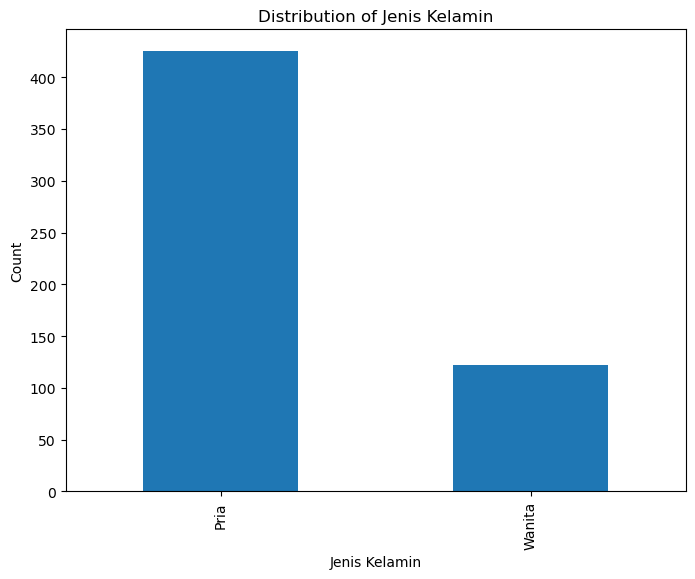

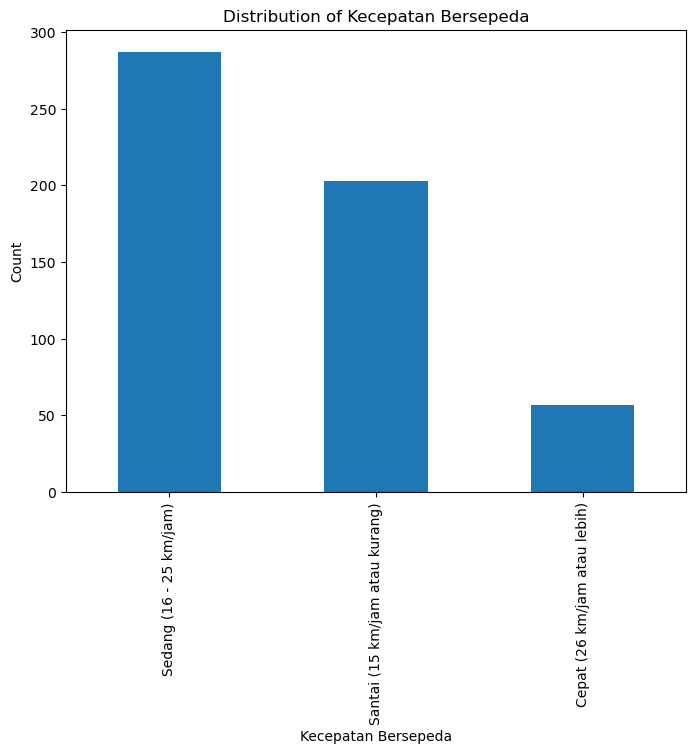

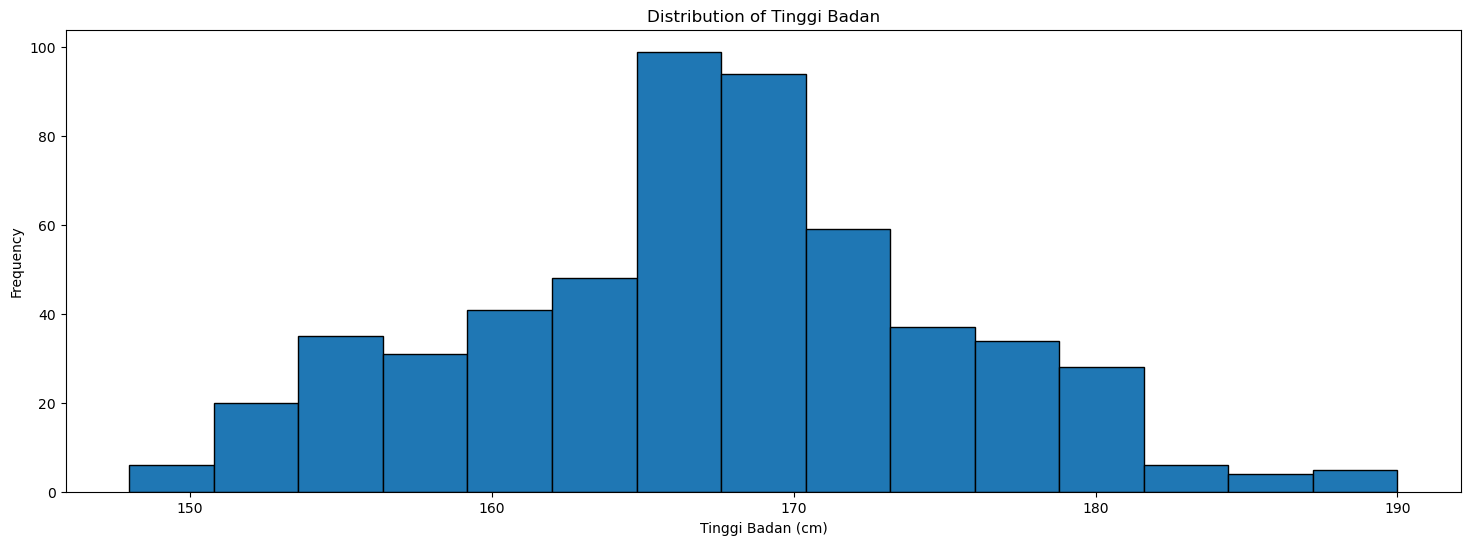

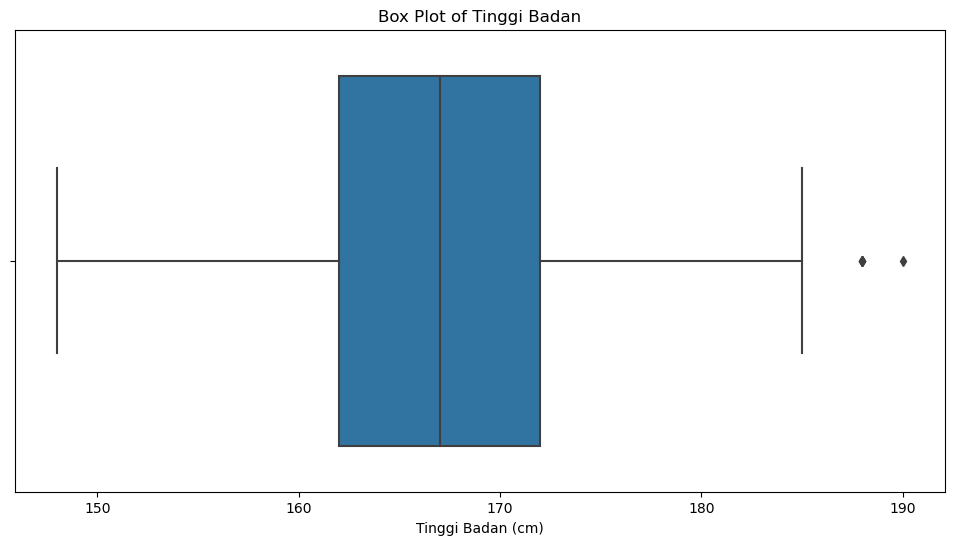

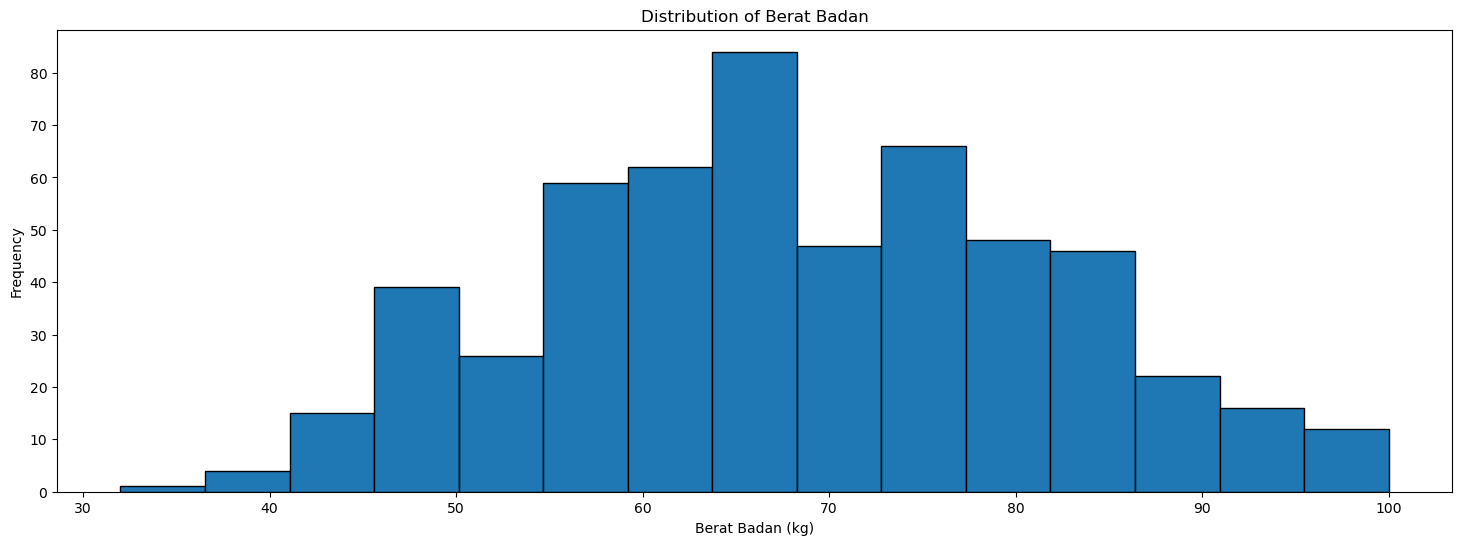

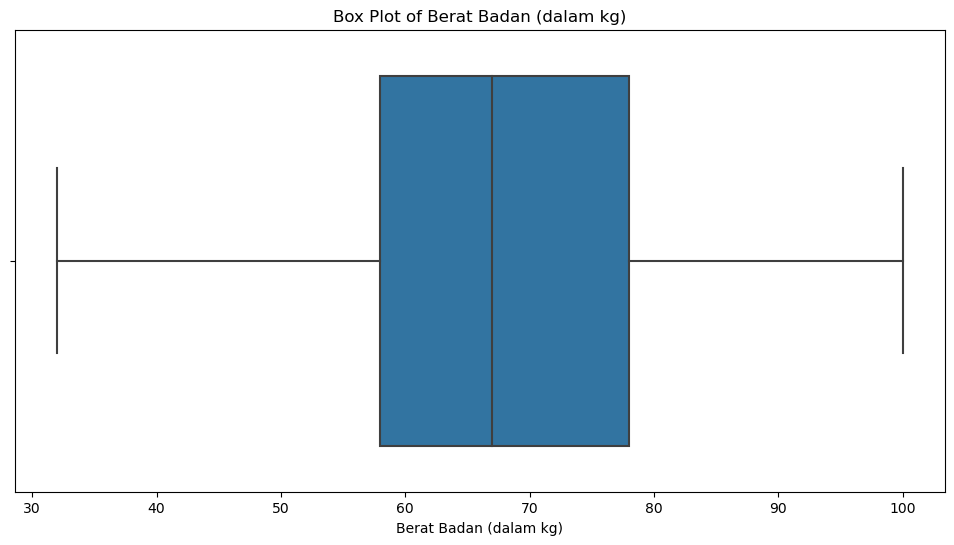

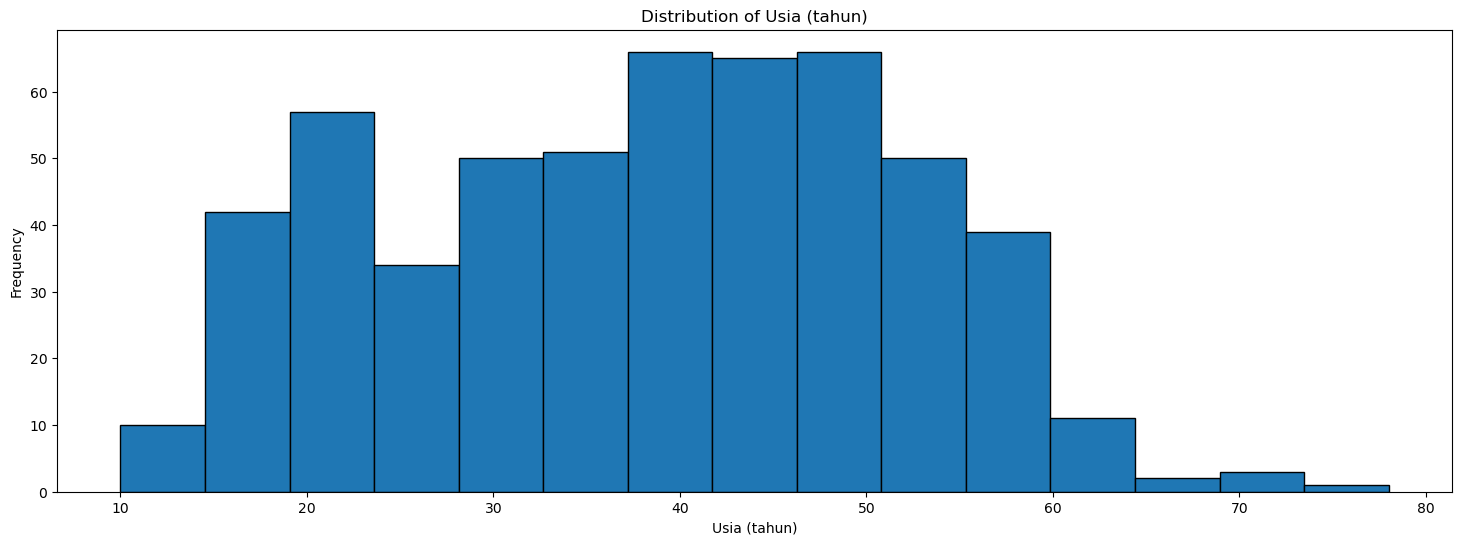

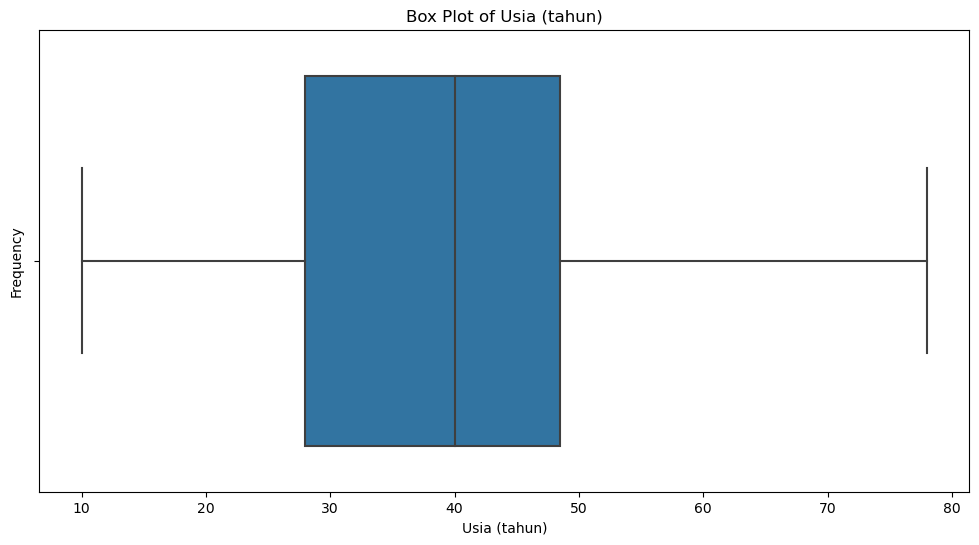

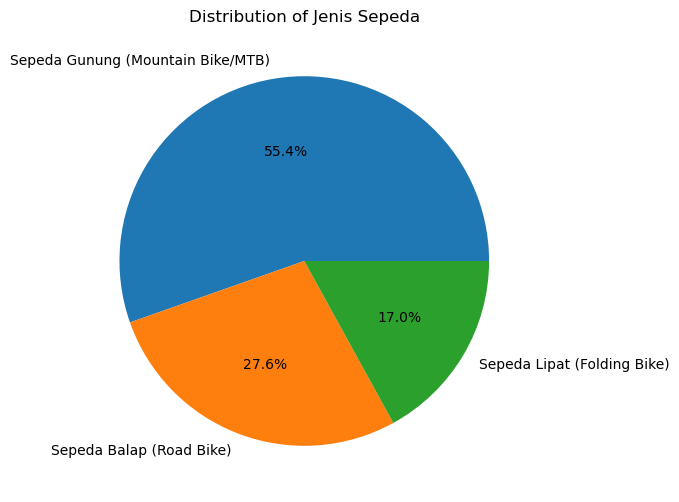

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
# Bar Chart for 'Jenis Kelamin'
plt.figure(figsize=(8, 6))
dataset['Jenis Kelamin'].value_counts().plot(kind='bar')
plt.title('Distribution of Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Count')
plt.show()

# Bar Chart for 'Kecepatan Bersepeda'
plt.figure(figsize=(8, 6))
dataset['Kecepatan Bersepeda'].value_counts().plot(kind='bar')
plt.title('Distribution of Kecepatan Bersepeda')
plt.xlabel('Kecepatan Bersepeda')
plt.ylabel('Count')
plt.show()

# Histogram for 'Tinggi Badan (dalam cm)'
plt.figure(figsize=(18, 6))
plt.hist(dataset['Tinggi Badan (dalam cm)'], bins=15, edgecolor='black')
plt.title('Distribution of Tinggi Badan')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='Tinggi Badan (dalam cm)')
plt.title('Box Plot of Tinggi Badan')
plt.xlabel('Tinggi Badan (cm)')
plt.show()

# Histogram for 'Berat Badan (dalam kg)'
plt.figure(figsize=(18, 6))
plt.hist(dataset['Berat Badan (dalam kg)'], bins=15, edgecolor='black')
plt.title('Distribution of Berat Badan')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='Berat Badan (dalam kg)')
plt.title('Box Plot of Berat Badan (dalam kg)')
plt.xlabel('Berat Badan (dalam kg)')
plt.show()

# Histogram for 'Tinggi Badan (dalam cm)'
plt.figure(figsize=(18, 6))
plt.hist(dataset['Usia (tahun)'], bins=15, edgecolor='black')
plt.title('Distribution of Usia (tahun)')
plt.xlabel('Usia (tahun)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='Usia (tahun)')
plt.title('Box Plot of Usia (tahun)')
plt.xlabel('Usia (tahun)')
plt.ylabel('Frequency')
plt.show()
# Pie Chart for 'Jenis Sepeda (yang paling sering digunakan)'
plt.figure(figsize=(8, 6))
dataset['Jenis Sepeda (yang paling sering digunakan)'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Jenis Sepeda')
plt.ylabel('')
plt.show()

# Scatter Plot for 'Ting


In [40]:
# Drop outliers Tinggi Badan
Q1_height = dataset['Tinggi Badan (dalam cm)'].quantile(0.25)
Q3_height = dataset['Tinggi Badan (dalam cm)'].quantile(0.75)
IQR_height = Q3_height - Q1_height
lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

dataset = dataset[(dataset['Tinggi Badan (dalam cm)'] >= lower_bound_height) & (dataset['Tinggi Badan (dalam cm)'] <= upper_bound_height)]

# Drop outliers Usia
Q1_age = dataset['Usia (tahun)'].quantile(0.25)
Q3_age = dataset['Usia (tahun)'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

dataset = dataset[(dataset['Usia (tahun)'] >= lower_bound_age) & (dataset['Usia (tahun)'] <= upper_bound_age)]

# Verify the updated dataset
print(dataset)


     Usia (tahun) Jenis Kelamin  Tinggi Badan (dalam cm)  \
0              45          Pria                      165   
1              50          Pria                      166   
2              43          Pria                      178   
3              40        Wanita                      165   
4              32        Wanita                      155   
..            ...           ...                      ...   
542            20        Wanita                      160   
543            22          Pria                      170   
544            20          Pria                      173   
545            21          Pria                      174   
546            20          Pria                      169   

     Berat Badan (dalam kg)             Kecepatan Bersepeda  \
0                        65         Sedang (16 - 25 km/jam)   
1                        80  Santai (15 km/jam atau kurang)   
2                        73    Cepat (26 km/jam atau lebih)   
3                        53

<Figure size 1200x600 with 0 Axes>

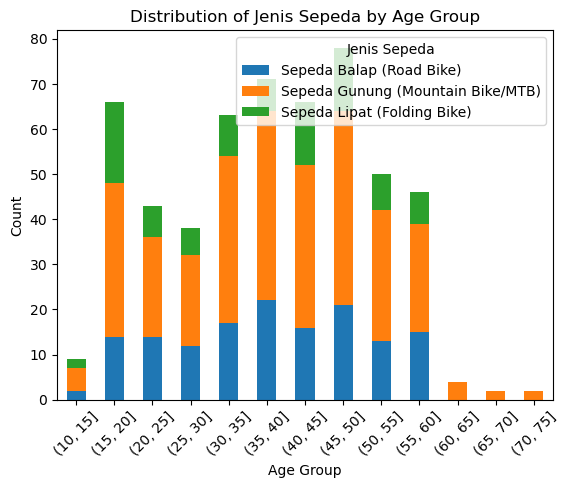

<Figure size 1200x600 with 0 Axes>

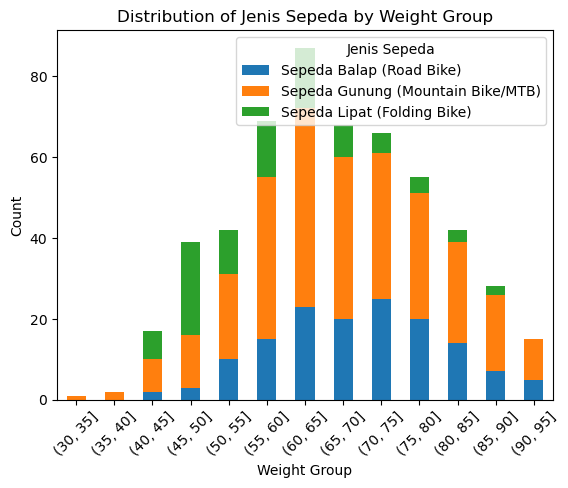

<Figure size 1200x600 with 0 Axes>

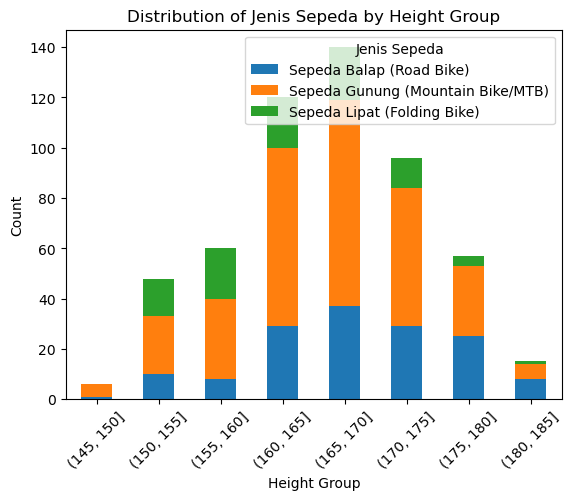

In [41]:
# Create age groups with 5-year intervals
age_groups = pd.cut(dataset['Usia (tahun)'], bins=range(10, 80, 5))

# Group the data by age groups and 'Jenis Sepeda', and calculate the counts
grouped_data = dataset.groupby([age_groups, 'Jenis Sepeda (yang paling sering digunakan)']).size().unstack()

# Plot the stacked bar plot
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Jenis Sepeda by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Jenis Sepeda')
plt.show()

# Create weight groups with 5kg intervals
weight_groups = pd.cut(dataset['Berat Badan (dalam kg)'], bins=range(30, 100, 5))

# Group the data by weight groups and 'Jenis Sepeda', and calculate the counts
grouped_data = dataset.groupby([weight_groups, 'Jenis Sepeda (yang paling sering digunakan)']).size().unstack()

# Plot the stacked bar plot
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Weight Group')
plt.ylabel('Count')
plt.title('Distribution of Jenis Sepeda by Weight Group')
plt.xticks(rotation=45)
plt.legend(title='Jenis Sepeda')
plt.show()

# Create height groups with 5cm intervals
height_groups = pd.cut(dataset['Tinggi Badan (dalam cm)'], bins=range(145, 190, 5))

# Group the data by height groups and 'Jenis Sepeda', and calculate the counts
grouped_data = dataset.groupby([height_groups, 'Jenis Sepeda (yang paling sering digunakan)']).size().unstack()

# Plot the stacked bar plot
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Height Group')
plt.ylabel('Count')
plt.title('Distribution of Jenis Sepeda by Height Group')
plt.xticks(rotation=45)
plt.legend(title='Jenis Sepeda')
plt.show()


/Users/vincent/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


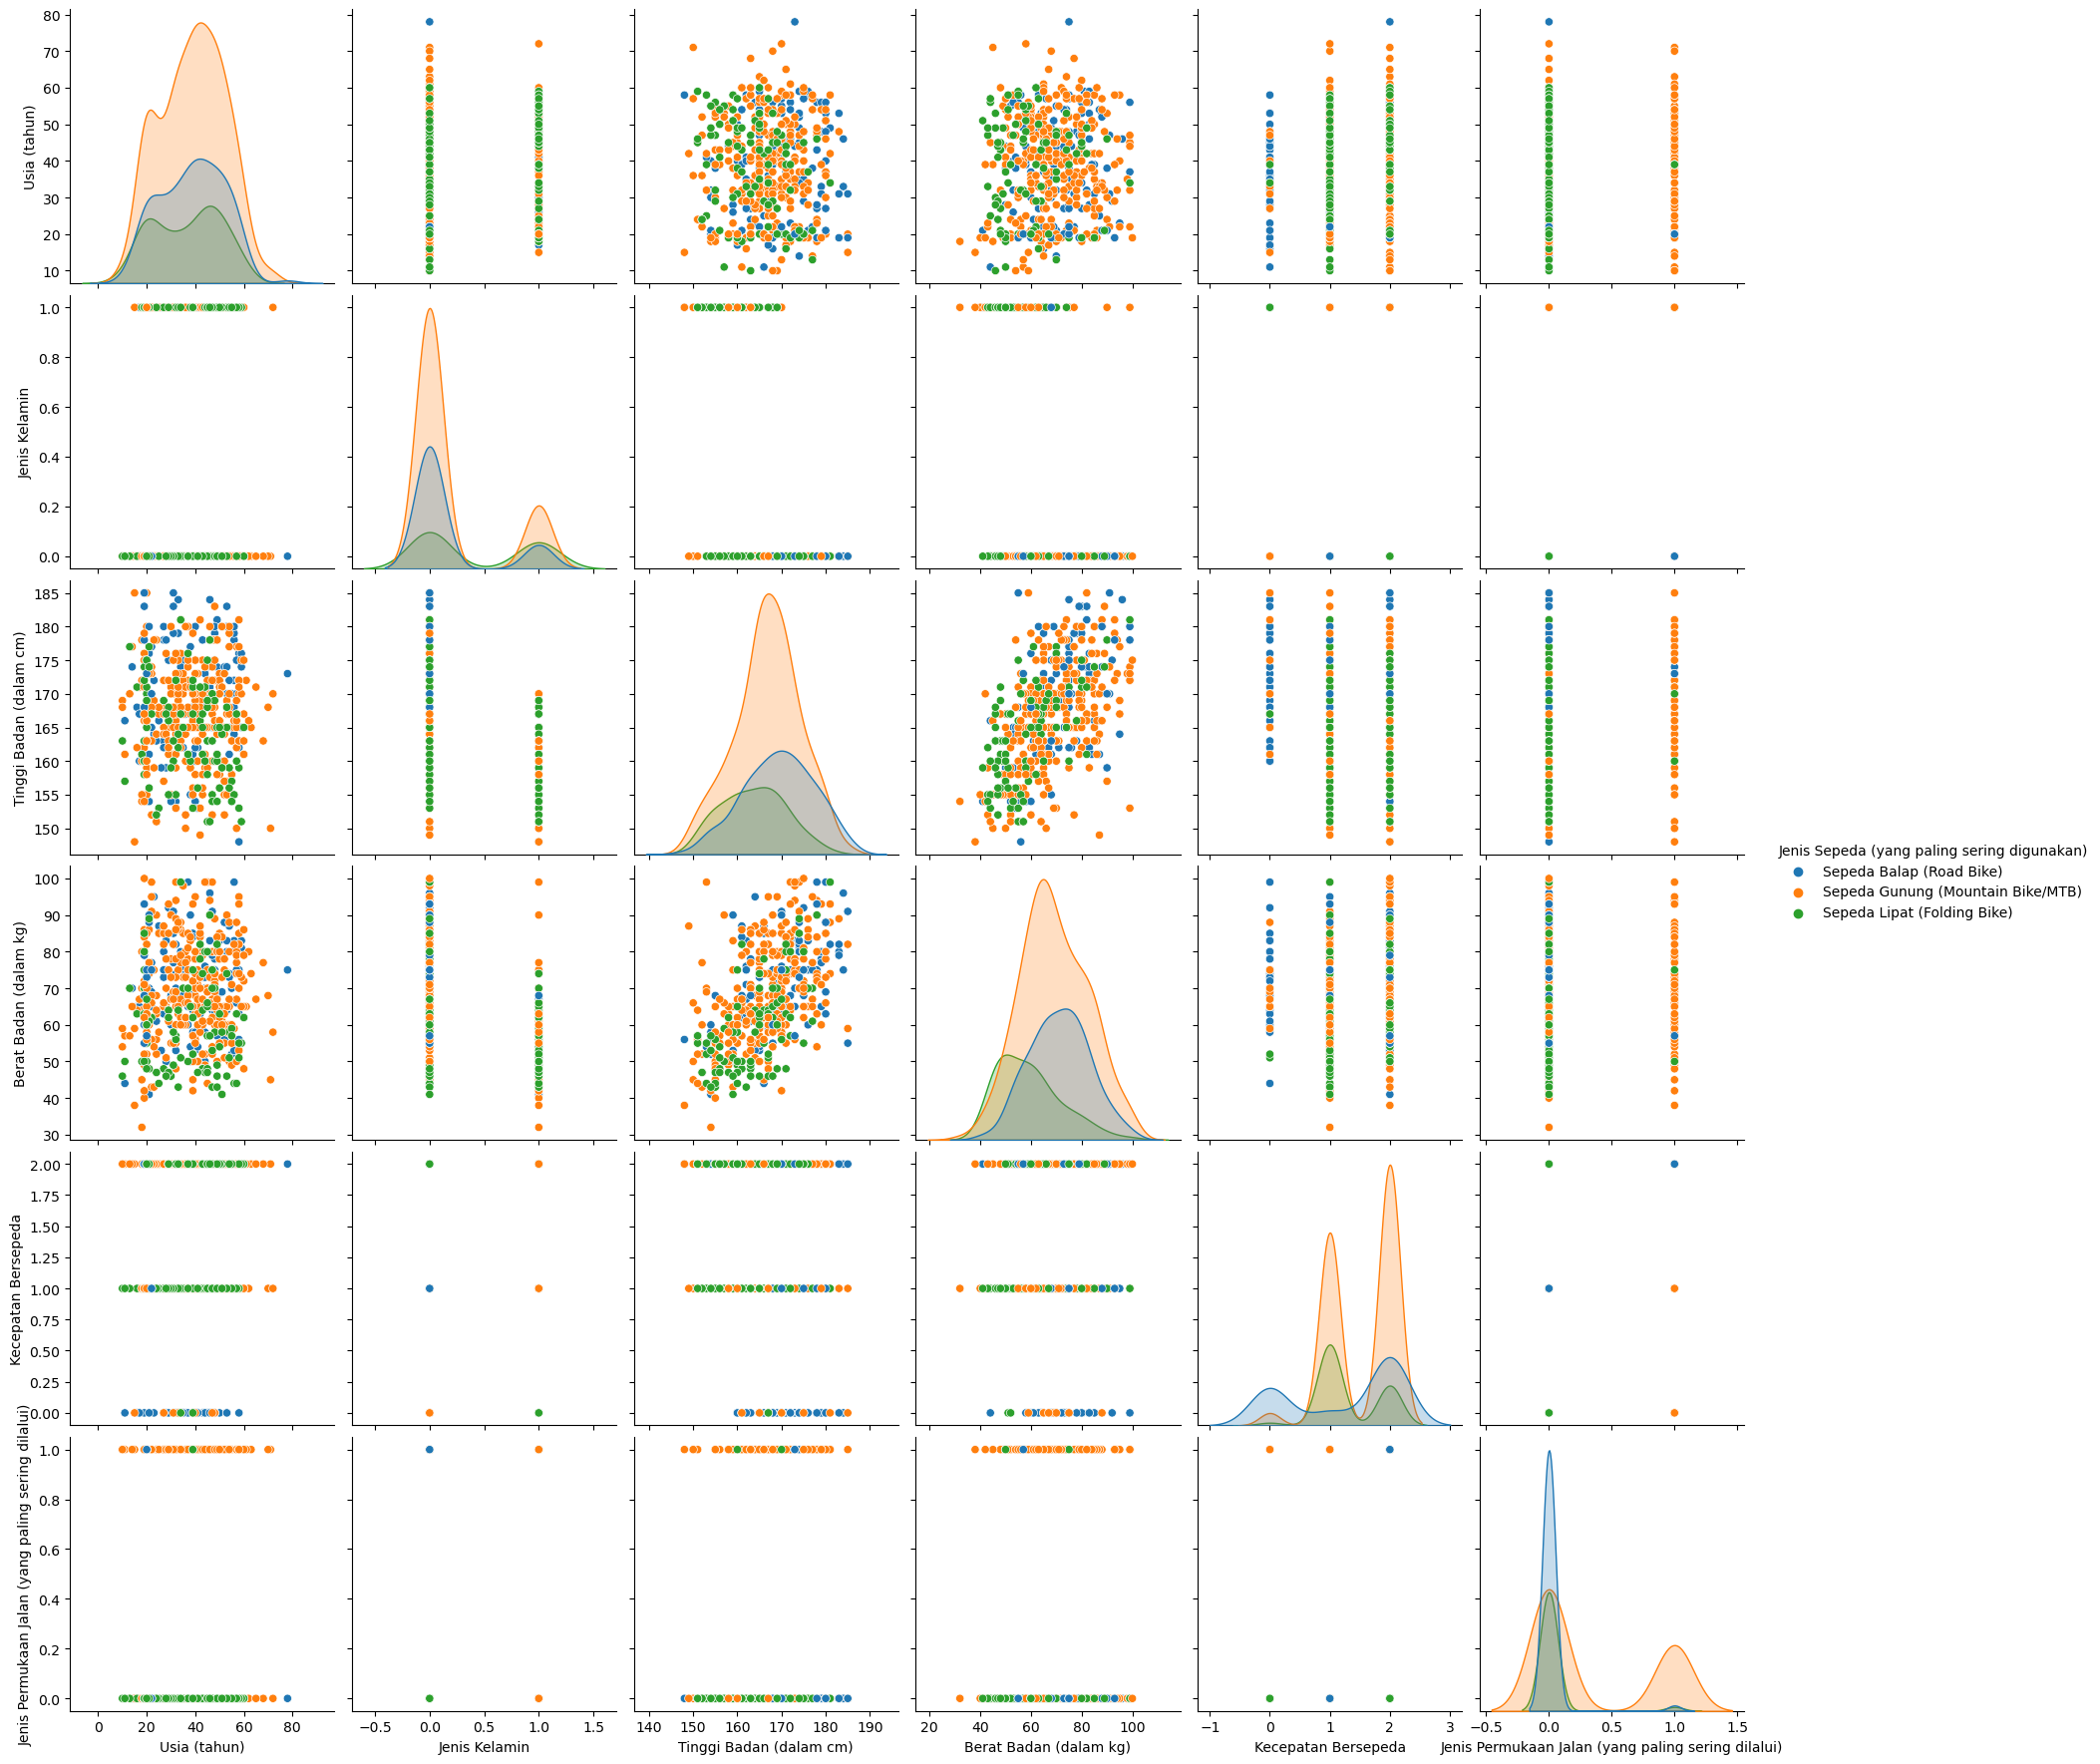

In [42]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_encode = ['Jenis Kelamin', 'Kecepatan Bersepeda', 'Jenis Permukaan Jalan (yang paling sering dilalui)']

# Apply LabelEncoder to the specified columns
for column in columns_to_encode:
    if column in dataset.columns and dataset[column].dtype == 'object':
        encoded_values = le.fit_transform(dataset[column])
        dataset[column] = encoded_values

# Male= 0
# Female= 1

#Cepat = 0
#Sedang = 2
#Santai = 1

#Rata = 0
#Bergelombang 1

# Display the pair plot to show if dataset are clearly separated
sns.pairplot(dataset, height=3, hue="Jenis Sepeda (yang paling sering digunakan)")
plt.show()

In [43]:
# Assign the predictor and target variables
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

In [44]:
# Assign the predictor and target variables
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = dataset.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = dataset.iloc[:, -1].values

In [45]:
# # Perform Train Test Split using test size of 25% and random state of 0
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Make the classification model
classifier = KNeighborsClassifier(n_neighbors=7,metric = "euclidean")

# Note: X_train doesn't need array.reshape(-1,1) because it's already 2D
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [48]:
# Male= 0
# Female= 1

#Cepat = 0
#Sedang = 2
#Santai = 1

#Rata = 0
#Bergelombang 1

# Predict the anonymous new data
usia = 20
kelamin = 1
tinggi = 175
berat = 67
kecepatan = 0 
jenis_jalan = 0 
print(classifier.predict([[usia,kelamin,tinggi,berat,kecepatan,jenis_jalan]]))

y_pred = classifier.predict(X_test)

['Sepeda Balap (Road Bike)']


In [49]:
# Make a dataframe to show y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate

,y_test,y_pred
0,Sepeda Lipat (Folding Bike),Sepeda Gunung (Mountain Bike/MTB)
1,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)
2,Sepeda Balap (Road Bike),Sepeda Gunung (Mountain Bike/MTB)
3,Sepeda Balap (Road Bike),Sepeda Balap (Road Bike)
4,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)
...,...,...
104,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)
105,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)
106,Sepeda Lipat (Folding Bike),Sepeda Lipat (Folding Bike)
107,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Identifying TP, TN, FP, and FN
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Get the number of classes
num_classes = len(cm)

# Get the unique values in the target variable
unique_labels = np.unique(y)

# Create a dictionary to map class indices to labels
class_labels = {i: label for i, label in enumerate(unique_labels)}

# Display the accuracy score
print("Accuracy Score: {:0.4f}".format(accuracy_score(y_test, y_pred)))

Confusion Matrix:
[[18  8  3]
 [ 9 48  6]
 [ 1  5 11]]
Accuracy Score: 0.7064


In [51]:
# Perform Train Test Split using test size of 25% and random state of 0
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


In [52]:
from sklearn.linear_model import LogisticRegression

# Make classification model using logistic regression
classifier = LogisticRegression()

# Note: X_train doesn't need array.reshape(-1,1) because it's already 2D
classifier.fit(X_train, y_train)

/Users/vincent/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Male= 0
# Female= 1

#Cepat = 0
#Sedang = 2
#Santai = 1

#Rata = 0
#Bergelombang 1

# Predict
usia = 20
kelamin = 1
tinggi = 175
berat = 67
kecepatan = 0 
jenis_jalan = 0 
print(classifier.predict([[usia,kelamin,tinggi,berat,kecepatan,jenis_jalan]]))

y_pred = classifier.predict(X_test)

['Sepeda Lipat (Folding Bike)']


In [54]:
# Make a dataframe to show y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head()

,y_test,y_pred
0,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)
1,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)
2,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)
3,Sepeda Lipat (Folding Bike),Sepeda Lipat (Folding Bike)
4,Sepeda Gunung (Mountain Bike/MTB),Sepeda Gunung (Mountain Bike/MTB)


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Get the number of classes
num_classes = len(cm)

# Get the unique values in the target variable
unique_labels = np.unique(y)

# Create a dictionary to map class indices to labels
class_labels = {i: label for i, label in enumerate(unique_labels)}

# Display the accuracy score
print("Accuracy Score: {:0.4f}".format(accuracy_score(y_test, y_pred)))

Confusion Matrix:
[[ 6 14  1]
 [10 56  2]
 [ 1 11  8]]
Accuracy Score: 0.6422
